In [90]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Bootstrap Confidence Interval
## Load the data

In [91]:
baby = Table().read_table("../data/baby.csv")
baby.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [92]:
print(f"The data set has {baby.num_rows} data points.")

The data set has 1174 data points.


## Calculate the population mean

In [93]:
average = np.mean(baby.column("Birth Weight"))
print(f"The average birth weight of the babies is {average:0.2f} ounces.")

The average birth weight of the babies is 119.46 ounces.


## Imagine we had only 20 measurements

In [94]:
sample_size = 20
data = baby.sample(sample_size)
data

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
117,328,29,65,125,True
97,279,33,61,105,True
91,292,19,61,125,False
84,272,25,64,150,True
136,278,23,61,105,False
104,288,27,61,122,True
123,314,22,61,121,True
110,275,25,63,120,False
79,268,36,61,108,False
120,289,31,59,102,False


In [95]:
sample_average = np.mean(data.column("Birth Weight"))
sample_average

117.25

## One bootstrap sample

In [96]:
new_sample = data.sample(sample_size)
new_sample.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
148,281,27,63,110,True
136,278,23,61,105,False
136,278,23,61,105,False


In [97]:
np.mean(new_sample.column("Birth Weight"))

122.09999999999999

## Bootstrap our sample many, many times

In [98]:
num_simulations = 10000
bootstrap_means = []
for i in np.arange(num_simulations):
    new_sample = data.sample(sample_size)
    new_sample_mean = np.mean(new_sample.column("Birth Weight"))
    bootstrap_means.append(new_sample_mean)

In [99]:
print("Max bootstrap mean", max(bootstrap_means))
print("Min bootstrap mean", min(bootstrap_means))

Max bootstrap mean 135.1
Min bootstrap mean 99.25


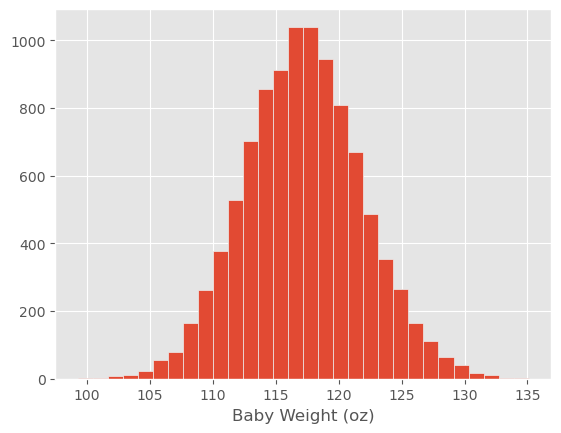

In [100]:
plt.hist(bootstrap_means, bins=30)
plt.xlabel("Baby Weight (oz)");

## Get the 95% confidence interval

In [108]:
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)
print(f"The estimated average newborn weight from the sample is:", sample_average)
print(f"The 95% confidence interval ranges from {left} to {right}")
print(f"The true average newborn weight is:", average)

The estimated average newborn weight from the sample is: 117.25
The 95% confidence interval ranges from 108.15 to 126.7
The true average newborn weight is: 119.462521295


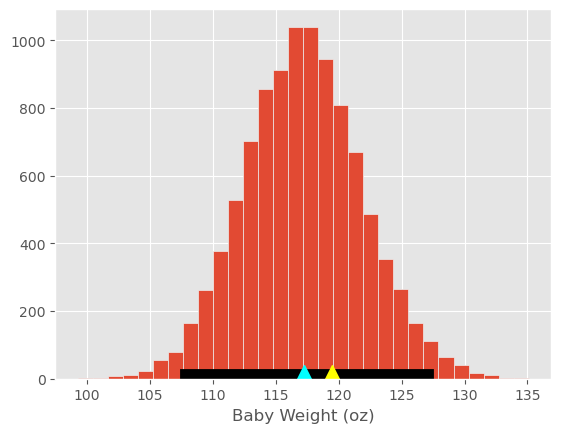

In [105]:
plt.hist(bootstrap_means, bins=30)
plt.plot([left, right], [0, 0], 'k', linewidth=15)
plt.plot(average, 0, '^', markersize=20, color='yellow')
plt.plot(sample_average, 0, '^', markersize=20, color='cyan')
plt.xlabel("Baby Weight (oz)");

# Confidence for slope of best-fit line

In [119]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz)) / np.std(xyz)


def correlation(t, label_x, label_y):
    return np.mean(
        standard_units(t.column(label_x)) * standard_units(t.column(label_y))
    )

# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r * np.std(t.column(label_y)) / np.std(t.column(label_x))


def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y) * np.mean(
        t.column(label_x)
    )

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [120]:
def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plt.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plt.xlabel(x)
    plt.ylabel(y)

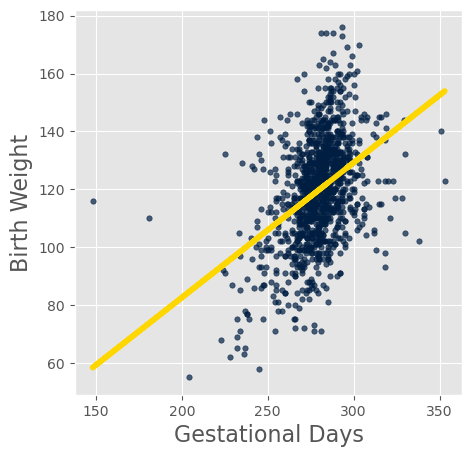

In [121]:
scatter_fit(baby, 'Gestational Days', 'Birth Weight')

In [122]:
correlation(baby, 'Gestational Days', 'Birth Weight')

0.40754279338885108

In [123]:
slope(baby, 'Gestational Days', 'Birth Weight')

0.46655687694921522

## Bootstrap the scatterplot
Notice the the slope is different each time you run the cell below.

0.52193426145527844

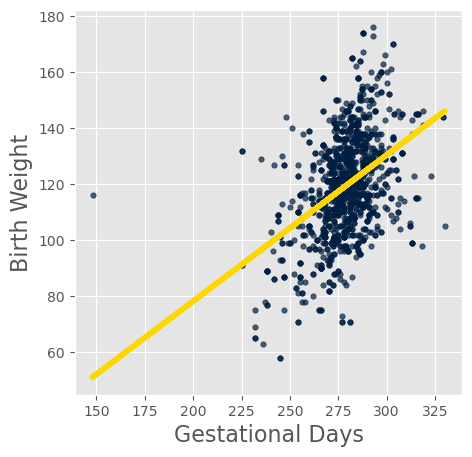

In [133]:
n = baby.num_rows
baby_boot = baby.sample(n)

scatter_fit(baby_boot, 'Gestational Days', 'Birth Weight')
slope(baby_boot, 'Gestational Days', 'Birth Weight')

## Bootstrap many times and store the slopes

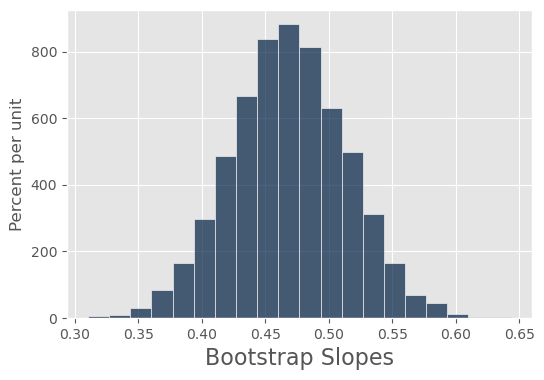

In [134]:
slopes = make_array()
for i in np.arange(5000):
    bootstrap_sample = baby.sample()
    bootstrap_slope = slope(bootstrap_sample, 'Gestational Days', 'Birth Weight')
    slopes = np.append(slopes, bootstrap_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

### Confidence interval for the slopes

In [135]:
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
left, right

(0.3807743286783466, 0.55663693186476615)

## There is (almost) always a python module the does what you want...
The Seaborn plotting module inludes a regression plot that includes a 95% confidence interval by default.

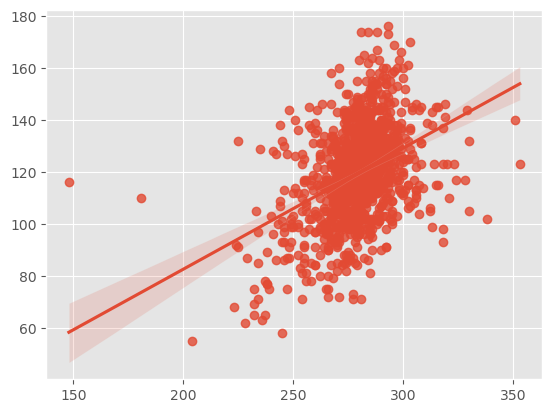

In [139]:
import seaborn as sns
sns.regplot(x=baby.column('Gestational Days'), y=baby.column('Birth Weight'));

The shaded regions is the 95% confidence interval for the slope. 

NOTE: The data set is strongly influeneced by a couple of outliers. In particular, a couple of chunky premies. It would be interesting to see if there is a reason to exclude these points.